# Bibliotecas Necessárias

In [1]:
%matplotlib inline

import os
from glob import glob

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

2025-02-18 09:03:30.068763: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-18 09:03:30.076831: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739880210.085917   21055 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739880210.088785   21055 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-18 09:03:30.098529: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Checando se a GPU Foi Detectada

In [2]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## Obtendo os Dados que Usaremos

In [3]:
cats = glob("./dataset/PetImages/Cat/*.jpg")
dogs = glob("./dataset/PetImages/Dog/*.jpg")

## Visualizando os Dados que Buscamos

In [4]:
cats

['./dataset/PetImages/Cat/5196.jpg',
 './dataset/PetImages/Cat/3755.jpg',
 './dataset/PetImages/Cat/3315.jpg',
 './dataset/PetImages/Cat/12387.jpg',
 './dataset/PetImages/Cat/6544.jpg',
 './dataset/PetImages/Cat/8135.jpg',
 './dataset/PetImages/Cat/9789.jpg',
 './dataset/PetImages/Cat/9254.jpg',
 './dataset/PetImages/Cat/1770.jpg',
 './dataset/PetImages/Cat/4652.jpg',
 './dataset/PetImages/Cat/7045.jpg',
 './dataset/PetImages/Cat/263.jpg',
 './dataset/PetImages/Cat/4424.jpg',
 './dataset/PetImages/Cat/1736.jpg',
 './dataset/PetImages/Cat/12183.jpg',
 './dataset/PetImages/Cat/1431.jpg',
 './dataset/PetImages/Cat/9297.jpg',
 './dataset/PetImages/Cat/2164.jpg',
 './dataset/PetImages/Cat/2121.jpg',
 './dataset/PetImages/Cat/3820.jpg',
 './dataset/PetImages/Cat/7331.jpg',
 './dataset/PetImages/Cat/12283.jpg',
 './dataset/PetImages/Cat/710.jpg',
 './dataset/PetImages/Cat/9752.jpg',
 './dataset/PetImages/Cat/8244.jpg',
 './dataset/PetImages/Cat/44.jpg',
 './dataset/PetImages/Cat/12357.jpg',
 

In [5]:
dogs

['./dataset/PetImages/Dog/5196.jpg',
 './dataset/PetImages/Dog/3755.jpg',
 './dataset/PetImages/Dog/3315.jpg',
 './dataset/PetImages/Dog/12387.jpg',
 './dataset/PetImages/Dog/6544.jpg',
 './dataset/PetImages/Dog/8135.jpg',
 './dataset/PetImages/Dog/9789.jpg',
 './dataset/PetImages/Dog/9254.jpg',
 './dataset/PetImages/Dog/1770.jpg',
 './dataset/PetImages/Dog/4652.jpg',
 './dataset/PetImages/Dog/7045.jpg',
 './dataset/PetImages/Dog/263.jpg',
 './dataset/PetImages/Dog/4424.jpg',
 './dataset/PetImages/Dog/1736.jpg',
 './dataset/PetImages/Dog/12183.jpg',
 './dataset/PetImages/Dog/1431.jpg',
 './dataset/PetImages/Dog/9297.jpg',
 './dataset/PetImages/Dog/2164.jpg',
 './dataset/PetImages/Dog/2121.jpg',
 './dataset/PetImages/Dog/3820.jpg',
 './dataset/PetImages/Dog/7331.jpg',
 './dataset/PetImages/Dog/12283.jpg',
 './dataset/PetImages/Dog/710.jpg',
 './dataset/PetImages/Dog/9752.jpg',
 './dataset/PetImages/Dog/8244.jpg',
 './dataset/PetImages/Dog/44.jpg',
 './dataset/PetImages/Dog/12357.jpg',
 

## Criando uma Função Para Obter a Imagem em Formato de Matriz NumPY A partir de Seu Caminho

In [6]:
def get_image(path: str):
    print(path)
    try:
        img = image.load_img(path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        return img, x
    except Exception as e:
        print(str(e))
        return None, None

## Usando Nossa Função para Obter Nossas Matrizes

In [7]:
cat_images = [get_image(os.path.abspath(path)) for path in cats]

/home/mauricio-benjamin/projects/courses/python-transfer-learning/dataset/PetImages/Cat/5196.jpg
/home/mauricio-benjamin/projects/courses/python-transfer-learning/dataset/PetImages/Cat/3755.jpg
/home/mauricio-benjamin/projects/courses/python-transfer-learning/dataset/PetImages/Cat/3315.jpg
/home/mauricio-benjamin/projects/courses/python-transfer-learning/dataset/PetImages/Cat/12387.jpg
/home/mauricio-benjamin/projects/courses/python-transfer-learning/dataset/PetImages/Cat/6544.jpg
/home/mauricio-benjamin/projects/courses/python-transfer-learning/dataset/PetImages/Cat/8135.jpg
/home/mauricio-benjamin/projects/courses/python-transfer-learning/dataset/PetImages/Cat/9789.jpg
/home/mauricio-benjamin/projects/courses/python-transfer-learning/dataset/PetImages/Cat/9254.jpg
/home/mauricio-benjamin/projects/courses/python-transfer-learning/dataset/PetImages/Cat/1770.jpg
/home/mauricio-benjamin/projects/courses/python-transfer-learning/dataset/PetImages/Cat/4652.jpg
/home/mauricio-benjamin/proje

In [8]:
dog_images = [get_image(path) for path in dogs]

./dataset/PetImages/Dog/5196.jpg
./dataset/PetImages/Dog/3755.jpg
./dataset/PetImages/Dog/3315.jpg
./dataset/PetImages/Dog/12387.jpg
./dataset/PetImages/Dog/6544.jpg
./dataset/PetImages/Dog/8135.jpg
./dataset/PetImages/Dog/9789.jpg
./dataset/PetImages/Dog/9254.jpg
./dataset/PetImages/Dog/1770.jpg
./dataset/PetImages/Dog/4652.jpg
./dataset/PetImages/Dog/7045.jpg
./dataset/PetImages/Dog/263.jpg
./dataset/PetImages/Dog/4424.jpg
./dataset/PetImages/Dog/1736.jpg
./dataset/PetImages/Dog/12183.jpg
./dataset/PetImages/Dog/1431.jpg
./dataset/PetImages/Dog/9297.jpg
./dataset/PetImages/Dog/2164.jpg
./dataset/PetImages/Dog/2121.jpg
./dataset/PetImages/Dog/3820.jpg
./dataset/PetImages/Dog/7331.jpg
./dataset/PetImages/Dog/12283.jpg
./dataset/PetImages/Dog/710.jpg
./dataset/PetImages/Dog/9752.jpg
./dataset/PetImages/Dog/8244.jpg
./dataset/PetImages/Dog/44.jpg
./dataset/PetImages/Dog/12357.jpg
./dataset/PetImages/Dog/10494.jpg
./dataset/PetImages/Dog/8608.jpg
./dataset/PetImages/Dog/146.jpg
./dataset/

/home/mauricio-benjamin/projects/courses/python-transfer-learning/.venv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


./dataset/PetImages/Dog/5584.jpg
./dataset/PetImages/Dog/5355.jpg
./dataset/PetImages/Dog/2440.jpg
./dataset/PetImages/Dog/5880.jpg
./dataset/PetImages/Dog/9742.jpg
./dataset/PetImages/Dog/10097.jpg
./dataset/PetImages/Dog/2912.jpg
./dataset/PetImages/Dog/7773.jpg
./dataset/PetImages/Dog/4494.jpg
./dataset/PetImages/Dog/2952.jpg
./dataset/PetImages/Dog/3735.jpg
./dataset/PetImages/Dog/11631.jpg
./dataset/PetImages/Dog/5631.jpg
./dataset/PetImages/Dog/241.jpg
./dataset/PetImages/Dog/7532.jpg
./dataset/PetImages/Dog/1382.jpg
./dataset/PetImages/Dog/3865.jpg
./dataset/PetImages/Dog/2445.jpg
./dataset/PetImages/Dog/10455.jpg
./dataset/PetImages/Dog/6206.jpg
./dataset/PetImages/Dog/7699.jpg
./dataset/PetImages/Dog/11781.jpg
./dataset/PetImages/Dog/10952.jpg
./dataset/PetImages/Dog/8211.jpg
./dataset/PetImages/Dog/11969.jpg
./dataset/PetImages/Dog/8741.jpg
./dataset/PetImages/Dog/10978.jpg
./dataset/PetImages/Dog/6980.jpg
./dataset/PetImages/Dog/9198.jpg
./dataset/PetImages/Dog/5268.jpg
./da

## Visualizando As Matrizes

In [9]:
cat_images

[(<PIL.Image.Image image mode=RGB size=224x224>,
  array([[[[-22.939003  , -27.779     , -21.68      ],
           [-22.939003  , -27.779     , -21.68      ],
           [-23.939003  , -28.779     , -22.68      ],
           ...,
           [125.061     ,  98.221     ,  93.32      ],
           [122.061     ,  96.221     ,  91.32      ],
           [117.061     ,  91.221     ,  86.32      ]],
  
          [[-23.939003  , -28.779     , -22.68      ],
           [-22.939003  , -27.779     , -21.68      ],
           [-22.939003  , -27.779     , -21.68      ],
           ...,
           [131.061     , 104.221     ,  99.32      ],
           [129.061     , 103.221     ,  98.32      ],
           [125.061     ,  99.221     ,  94.32      ]],
  
          [[-23.939003  , -28.779     , -22.68      ],
           [-22.939003  , -27.779     , -21.68      ],
           [-22.939003  , -27.779     , -21.68      ],
           ...,
           [132.061     , 105.221     , 100.32      ],
           [130

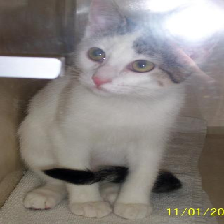

In [10]:
cat_images[0][0]

In [11]:
cat_images[0][1]

array([[[[-22.939003  , -27.779     , -21.68      ],
         [-22.939003  , -27.779     , -21.68      ],
         [-23.939003  , -28.779     , -22.68      ],
         ...,
         [125.061     ,  98.221     ,  93.32      ],
         [122.061     ,  96.221     ,  91.32      ],
         [117.061     ,  91.221     ,  86.32      ]],

        [[-23.939003  , -28.779     , -22.68      ],
         [-22.939003  , -27.779     , -21.68      ],
         [-22.939003  , -27.779     , -21.68      ],
         ...,
         [131.061     , 104.221     ,  99.32      ],
         [129.061     , 103.221     ,  98.32      ],
         [125.061     ,  99.221     ,  94.32      ]],

        [[-23.939003  , -28.779     , -22.68      ],
         [-22.939003  , -27.779     , -21.68      ],
         [-22.939003  , -27.779     , -21.68      ],
         ...,
         [132.061     , 105.221     , 100.32      ],
         [130.061     , 104.221     ,  99.32      ],
         [128.061     , 102.221     ,  97.32      ]],

In [12]:
dog_images

[(<PIL.Image.Image image mode=RGB size=224x224>,
  array([[[[151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           ...,
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ]],
  
          [[151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           ...,
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ]],
  
          [[151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           ...,
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ],
           [151.061  , 138.22101, 131.32   ]],
  
          ...,
  
          [[151.061  , 138.22101, 131.32   ],

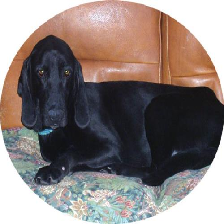

In [13]:
dog_images[0][0]

In [14]:
dog_images[0][1]

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


## Contabilizando o Total de Imagens

In [15]:
len(cat_images)

12500

In [16]:
len(dog_images)

12500

## Removendo as Imagens que Falharam

In [17]:
cat_images = [img for img in cat_images if img[0] is not None and img[1] is not None]

In [18]:
len(cat_images)

12499

In [19]:
dog_images = [img for img in dog_images if img[0] is not None and img[1] is not None]

In [20]:
len(dog_images)

12499

# Divisão dos Dados

In [21]:
train_split = 0.7
test_split = 0.15
val_split = 0.15

# Definição das Classes

In [22]:
classes = {
    "cat": 0,
    "dog": 1
}

# Agrupando os Dados

In [23]:
data = []
for image, array in enumerate(cat_images):
        data.append({'x':np.array(array[0]), 'y':classes["cat"]})
        
for image, array in enumerate(dog_images):
        data.append({'x':np.array(array[0]), 'y':classes["dog"]})



# Randomizando os Dados Para Fornecer Consistência aos Resultados Futuros

In [24]:
random.shuffle(data)

# Visualizando a Quantidade de Dados

In [25]:
num_data = len(data)
num_data

24998

In [26]:
num_classes = len(classes)

# Dividindo os Dados em Treino, Teste e Validação

In [27]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

# Separando os Dados dos Rotulos

In [28]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 

# Pré-Processamento dos Dados Para Normalização

Após a normalização:

- Os valores de pixel irão variar entre 0 e 1, sendo do tipo float32
- converte as classes (inteiros) em vetores one-hot (Por exemplo, se num_classes for 2 e a classe for 1, o vetor one-hot será [0, 1], se for a classe 0, será [1,0])

In [ ]:
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)